## > Gerando data sensível falsa.

In [1]:
from gen_fake_csv_data import SensitiveDataGenerator

sensitive_data_gen = SensitiveDataGenerator('pt_BR')
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_treino.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="cpf_list_mix_teste.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_cpf_random(name="dataset_cpf_list_mix.csv", title=['Coluna A', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_treino.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="apenas_dados_sensiveis_teste.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)

### Imports de bibliotecas importantes

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
#import functools

import tensorflow as tf
import pandas as pd
import numpy as np

from plot_history_helper import plot_history_accuracy, plot_history_loss
from tensorflow import keras
from keras.backend import clear_session
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
# clear_session() -> limpa o estado da antiga sessão.

## Testando modelo para uma coluna de dados misturados, [Coluna, Classe].

### Leitura de dados de treino

In [3]:
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./cpf_list_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
  if X_train[i].dtypes == 'object':
    X_train[i] = le.fit_transform(X_train[i])

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                           Coluna A  Classe
0               Projetista mecânico       0
1                    125.096.473-34       1
2    Instalador de linha telefônica       0
3                        Urologista       0
4                    581.936.027-30       1
..                              ...     ...
994                           Caixa       0
995                  184.596.703-84       1
996                     Continuista       0
997                       Ombudsman       0
998                 Traumatologista       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\2503926590.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Leitura de dados de teste.

In [4]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./cpf_list_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)


# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                    Coluna A  Classe
0             673.284.519-55       1
1                    Maestro       0
2             348.069.215-05       1
3                  Meredeira       0
4             Cerimonialista       0
..                       ...     ...
994  Engenheiro de alimentos       0
995                 Mecânico       0
996           310.267.845-90       1
997               Aeroviário       0
998     Segurança particular       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\2450308004.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criando o modelo.

In [5]:
from keras import layers
print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model_col1 = keras.Sequential()
model_col1.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model_col1.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model_col1.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model_col1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_col1.summary() # Mostra os paramestros disponíveis para treinar

1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### Treinamento e validação deste modelo.

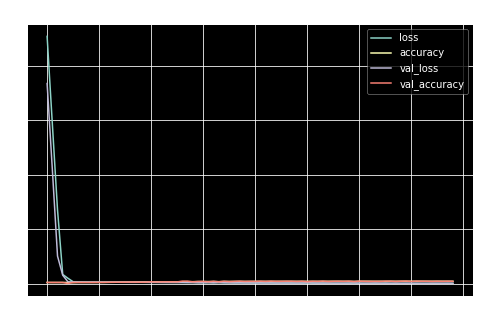

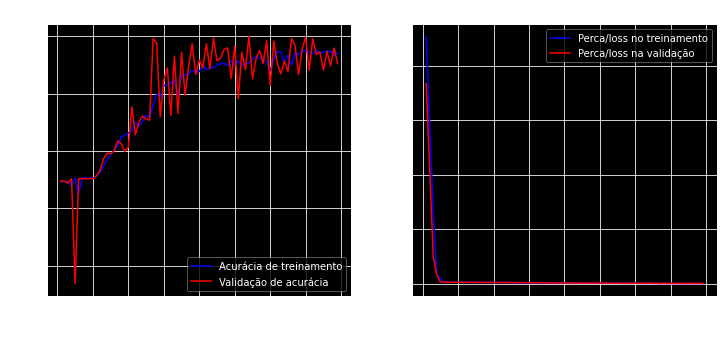

In [6]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

plot.style.use('dark_background')

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)

# Treinando o modelo.
history = model_col1.fit(
  X_train,
  y_train,
  epochs=100,
  verbose=False,
  validation_data=(X_test, y_test),
  batch_size=50,
  callbacks =[earlystopping]
)

# Mostrando resultados do treinamento com dataset de train.
pd.DataFrame(history.history).plot(figsize=(8,5))
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Avaliação deste modelo.

In [7]:

loss, accuracy = model_col1.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9459
Acurácia no teste: 0.9459459185600281
Perca no teste: 0.18452584743499756


### Dataset para realizar a previsão do modelo.

In [8]:
dataset = pd.read_csv("./dataset_cpf_list_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

#print(dataset)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                 Coluna A  Classe
0              Petroleiro       0
1          983.754.162-82       1
2    Assistente de câmera       0
3          751.023.948-60       1
4          308.765.294-65       1
..                    ...     ...
994        248.170.356-17       1
995    Militar da Marinha       0
996        015.932.847-05       1
997          Escriturário       0
998           Caldeireiro       0

[999 rows x 2 columns]


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\3342128598.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


In [9]:
model_col1.summary()
print("________________________________Previsão_________________________________")
predict_x=model_col1.predict(dataset[:100]) 
classes_x=np.argmax(predict_x, axis=1)
print(f"{predict_x}, {classes_x}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________
________________________________Previsão_________________________________
4/4 [==============================] - 0s 2ms/step
[[0.02728825]
 [0.31402588]
 [0.24334446]
 [0.6305391 ]
 [0.9565367 ]
 [0.05112305]
 [0.04859008]
 [0.38688645]
 [0.9043259 ]
 [0.44925478]
 [0.3717725 ]
 [0.8281052 ]
 [0.01255145]
 [0.57423806]
 

In [10]:
# Mostrando as previsões
for i in range(100):
	print(f"X={dataset[i]} Previsão={predict_x[i]}")

X=[776] Previsão=[0.02728825]
X=[515] Previsão=[0.31402588]
X=[548] Previsão=[0.24334446]
X=[392] Previsão=[0.6305391]
X=[153] Previsão=[0.9565367]
X=[715] Previsão=[0.05112305]
X=[720] Previsão=[0.04859008]
X=[485] Previsão=[0.38688645]
X=[232] Previsão=[0.9043259]
X=[461] Previsão=[0.44925478]
X=[491] Previsão=[0.3717725]
X=[295] Previsão=[0.8281052]
X=[850] Previsão=[0.01255145]
X=[414] Previsão=[0.57423806]
X=[787] Previsão=[0.0243329]
X=[494] Previsão=[0.36430565]
X=[70] Previsão=[0.98164564]
X=[710] Previsão=[0.0537806]
X=[172] Previsão=[0.9472569]
X=[156] Previsão=[0.9551826]
X=[532] Previsão=[0.27622655]
X=[411] Previsão=[0.58206415]
X=[193] Previsão=[0.934836]
X=[340] Previsão=[0.7485361]
X=[747] Previsão=[0.03684872]
X=[209] Previsão=[0.9236001]
X=[627] Previsão=[0.12136157]
X=[753] Previsão=[0.03463796]
X=[465] Previsão=[0.43868932]
X=[505] Previsão=[0.3375122]
X=[557] Previsão=[0.22605664]
X=[606] Previsão=[0.14742757]
X=[168] Previsão=[0.94935465]
X=[709] Previsão=[0.05432

### Comparando os 6 primeiros resultados anteriores lado a lado:
*Ultima iteração feita no modelo 2.0*
1. Petroleiro,0             | X=[776] Previsão=[0.04203822]

2. 983.754.162-82,1         | X=[515] Previsão=[0.35146546]

3. Assistente de câmera,0   | X=[548] Previsão=[0.2828425]

4. 751.023.948-60,1		      | X=[392] Previsão=[0.6392239]

5. 308.765.294-65,1		      | X=[153] Previsão=[0.94653213]

6. Lavador,0                | X=[715] Previsão=[0.0731863]

## > Testando agora um modelo, ainda Sequencial, mas com dataset formado por 3 colunas - [Coluna A, Coluna B, Coluna C, Classe].

## > Lendo CSV e criando dados de teste e treino com 3 colunas para o modelo.

### Lendo dados de treinamento

In [11]:
clear_session()
# SESSÃO DE TREINAMENTO.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_train = pd.read_csv("./dados_sensiveis_mix_treino.csv")
X_train.fillna(X_train.mean(), inplace=True)

columns = list(X_train)
print(X_train)

# # Categorizando.
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = pd.Categorical(pd.factorize(X_train[i])[0])

print(X_train)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])

print(X_train)

y_train = X_train["Classe"]
X_train.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_train = X_train.values
y_train = y_train.values
# FIM SESSÃO DE TREINAMENTO.

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\1593972125.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.fillna(X_train.mean(), inplace=True)


### Lendo dados de teste.

In [12]:
# SESSÃO DE TESTE.
# Lendo dados de entrada.
# database de dados sensíveis apenas.
X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

columns = list(X_test)
print(X_test)

# Categorizando.
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = pd.Categorical(pd.factorize(X_test[i])[0])

#print(X_test)

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X_test[i].dtypes == 'object':
        X_test[i] = le.fit_transform(X_test[i])

print(X_test)

y_test = X_test["Classe"]
X_test.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X_test = X_test.values
y_test = y_test.values
# FIM SESSÃO DE TESTE.

                Coluna A          Coluna B             Coluna C  Classe
0             Caio Sales  4338960286895990         61 0186 3082       1
1    Sra. Clara Silveira  3575708029479091  +55 (081) 8085-4262       1
2            Diogo Cunha  2250213920610567         21 5979-7957       1
3         Pietro Pereira  5473615923423406      (084) 7681-8755       1
4            Maria Gomes     Android 5.0.1            Chargista       0
..                   ...               ...                  ...     ...
994      Bernardo Castro       Android 3.1      Perito criminal       0
995       Helena Almeida  2295591628111286         41 4577-5196       1
996  Enzo Gabriel Aragão  6500627849181641      (051) 7840 6156       1
997   Gabrielly da Cunha   180022558844045  +55 (051) 6128-1259       1
998        Stella Araújo  4907142878366588     +55 71 4365 5104       1

[999 rows x 4 columns]
    Coluna A Coluna B Coluna C  Classe
0          0        0        0       1
1          1        1        1    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\2461429639.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


### Criação de modelo

In [16]:
from keras import layers
print(X_train.shape[1])
input_dim = X_train.shape[1]

# modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(8, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(4, input_dim = input_dim, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# Configurando o modelo de treinamento.
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=[
    keras.metrics.TruePositives(name='true_positives'),
    keras.metrics.FalsePositives(name='false_positives'),
    keras.metrics.TrueNegatives(name='true_negatives'),
    keras.metrics.FalseNegatives(name='false_negatives'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    ]
  )
model.summary() # Mostra os paramestros disponíveis para treinar

3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________


### Treinamento e teste do modelo.

In [17]:
import matplotlib.pyplot as plot
from plot_history_helper import plot_history
from keras import callbacks

earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 10, restore_best_weights = True)

#Treinando o modelo.
#history = model.fit(
#  X_train,
#  y_train,
#  epochs=100,
#  verbose=2,
#)

#Mostrando resultados do treinamento com dataset de train.
#pd.DataFrame(history.history).plot(figsize=(8,5))
#plot.show()

# Treinando o modelo.
history = model.fit(
  X_train,
  y_train,
  epochs=100,
  verbose=True,
  validation_data=(X_test, y_test),
  batch_size=50,
  callbacks =[earlystopping]
)

Epoch 1/100
20/20 [==============================] - 3s 51ms/step - loss: 13.6964 - true_positives: 495.0000 - false_positives: 432.0000 - true_negatives: 72.0000 - false_negatives: 0.0000e+00 - accuracy: 0.5676 - precision: 0.5340 - val_loss: 5.4504 - val_true_positives: 522.0000 - val_false_positives: 284.0000 - val_true_negatives: 192.0000 - val_false_negatives: 1.0000 - val_accuracy: 0.7147 - val_precision: 0.6476
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 3.5762 - true_positives: 495.0000 - false_positives: 238.0000 - true_negatives: 266.0000 - false_negatives: 0.0000e+00 - accuracy: 0.7618 - precision: 0.6753 - val_loss: 2.3857 - val_true_positives: 521.0000 - val_false_positives: 218.0000 - val_true_negatives: 258.0000 - val_false_negatives: 2.0000 - val_accuracy: 0.7798 - val_precision: 0.7050
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 1.8364 - true_positives: 494.0000 - false_positives: 157.0000 - true_negatives: 347.

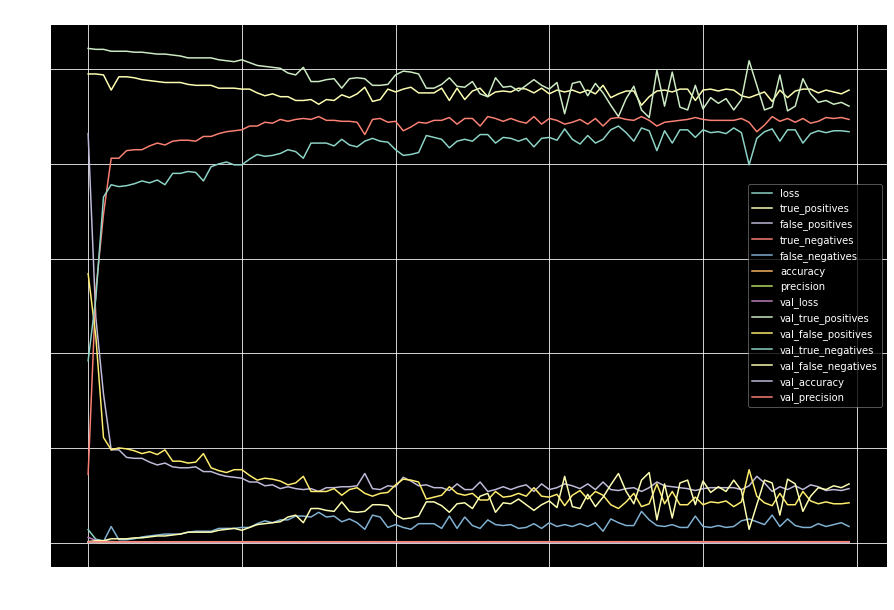

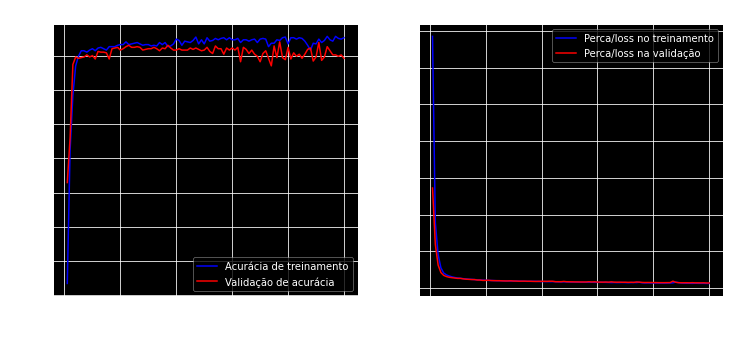

In [18]:
# Mostrando resultados do treinamento com dataset de train.
df = pd.DataFrame(history.history).plot(figsize=(15,10))
plot.xlabel('Épocas')
plot.ylabel('Tamanho Amostra')
plot.title('Modelo no Treinamento')
plot.show()

plot_history(history)
print()

### Realizando a Avaliação do modelo utilizando os dados de teste.

In [19]:

loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
#loss, accuracy = model.evaluate(X_test, y_test, verbose=1, batch_size=32)
print(f"Acurácia no teste: {accuracy}")
print(f"Perca no teste: {loss}")

32/32 [==============================] - 0s 2ms/step - loss: 0.2860 - true_positives: 461.0000 - false_positives: 42.0000 - true_negatives: 434.0000 - false_negatives: 62.0000 - accuracy: 0.8959 - precision: 0.9165  
Acurácia no teste: 0.8958958983421326
Perca no teste: 0.28599289059638977


### Realizando previsão no dataset de teste.

In [20]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==========================

In [21]:
# Mostrando as previsões
for i in range(len(X_test)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, y_test={y_test[i]}")

X=[776] Previsão=[0.26692313], y_test=1
X=[515] Previsão=[0.35953265], y_test=1
X=[548] Previsão=[0.37556416], y_test=1
X=[392] Previsão=[0.39174634], y_test=1
X=[153] Previsão=[0.3897961], y_test=0
X=[715] Previsão=[0.3860023], y_test=1
X=[720] Previsão=[0.38638386], y_test=0
X=[485] Previsão=[0.38910168], y_test=0
X=[232] Previsão=[0.39182633], y_test=1
X=[461] Previsão=[0.3945578], y_test=0
X=[491] Previsão=[0.39729595], y_test=1
X=[295] Previsão=[0.40004033], y_test=0
X=[850] Previsão=[0.4027912], y_test=1
X=[414] Previsão=[0.40596816], y_test=0
X=[787] Previsão=[0.40829134], y_test=1
X=[494] Previsão=[0.41129035], y_test=1
X=[70] Previsão=[0.41449067], y_test=1
X=[710] Previsão=[0.41769826], y_test=0
X=[172] Previsão=[0.4209127], y_test=0
X=[156] Previsão=[0.42413396], y_test=0
X=[532] Previsão=[0.4273616], y_test=0
X=[411] Previsão=[0.4305956], y_test=1
X=[193] Previsão=[0.4338353], y_test=0
X=[340] Previsão=[0.19895719], y_test=0
X=[747] Previsão=[0.4630251], y_test=0
X=[209] Pr

### Realizando uma previsão com um dataset com dados sensíveis misturados com dados não sensíveis.

In [22]:
dataset = pd.read_csv("./dataset_dados_sensiveis_mix.csv")
dataset.fillna(dataset.mean(), inplace=True)

columns = list(dataset)
print(dataset)

# Categorizando.
for i in columns:
    if dataset[i].dtypes == 'object':
        dataset[i] = pd.Categorical(pd.factorize(dataset[i])[0])

print(dataset)

# Fazendo o pré processamento.
#le = preprocessing.LabelEncoder()
#for i in columns:
#    if dataset[i].dtypes == 'object':
#        dataset[i] = le.fit_transform(dataset[i])

classes = dataset["Classe"]
dataset.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
dataset = dataset.values
classes = classes.values

                       Coluna A          Coluna B                Coluna C  \
0            Caroline Rodrigues     Android 4.1.2  Cientista de alimentos   
1             Davi Luiz da Cruz   340900984445791            61 5813-9187   
2                 Otávio Moraes  4499121817705274     +55 (011) 4377-8486   
3             Dra. Sarah Novaes     4628965763638            81 1192 0671   
4                Eduarda da Paz  3515645407486970     +55 (061) 0156 9998   
..                          ...               ...                     ...   
994               Murilo Moraes  3593316473596796        +55 81 5744-3853   
995  Srta. Vitória da Conceição     Android 2.3.1           Acupunturista   
996             Kamilly Pereira     4650236442354     +55 (031) 1874 9871   
997              Isabel Correia   213134431563097     +55 (084) 1824 0876   
998            Leonardo Ribeiro     4935240491798        +55 21 9418-7378   

     Classe  
0         0  
1         1  
2         1  
3         1  
4    

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\3886828975.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace=True)


### Previsão

In [23]:
model.summary()
print("> Realizando a previsão.")
predict_x=model.predict(dataset) 
classes_x=np.argmax(predict_x, axis=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 349
Trainable params: 349
Non-trainable params: 0
_________________________________________________________________
> Realizando a previsão.
32/32 [==========================

In [24]:
# Mostrando as previsões
for i in range(len(dataset)):
	print(f"X={dataset[i]} Previsão={predict_x[i]}, classe={classes[i]}")

X=[0 0 0] Previsão=[0.26692313], classe=0
X=[1 1 1] Previsão=[0.35953265], classe=1
X=[2 2 2] Previsão=[0.37556416], classe=1
X=[3 3 3] Previsão=[0.39174634], classe=1
X=[4 4 4] Previsão=[0.3897961], classe=1
X=[5 5 5] Previsão=[0.3860023], classe=1
X=[6 6 6] Previsão=[0.38638386], classe=1
X=[7 7 7] Previsão=[0.38910168], classe=1
X=[8 8 8] Previsão=[0.39182633], classe=0
X=[9 9 9] Previsão=[0.3945578], classe=0
X=[10 10 10] Previsão=[0.39729595], classe=1
X=[11 11 11] Previsão=[0.40004033], classe=1
X=[12 12 12] Previsão=[0.4027912], classe=0
X=[13 13 13] Previsão=[0.40596816], classe=0
X=[14 14 14] Previsão=[0.40829134], classe=1
X=[15 15 15] Previsão=[0.41129035], classe=1
X=[16 16 16] Previsão=[0.41449067], classe=1
X=[17 17 17] Previsão=[0.41769826], classe=0
X=[18 18 18] Previsão=[0.4209127], classe=0
X=[19 19 19] Previsão=[0.42413396], classe=0
X=[20 20 20] Previsão=[0.4273616], classe=0
X=[21 21 21] Previsão=[0.4305956], classe=0
X=[22 22 22] Previsão=[0.4338353], classe=0
X=[

### Análisando apenas as previsões feita pelo modelo.

### Detecção de outliers usando Desvio Padrão.

Como um padrão para quase todo dataset, pelo menos 90.7% dele esta entre três tipos de desvio padrão, com os outliers perto de 0.3% do tamanho do dataset.

Média dos valores: 
predict    0.578659
dtype: float32

Desvio de padrão dos valores: 
predict    0.354753
dtype: float32


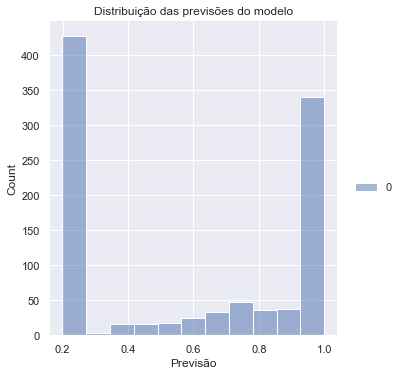

In [25]:

import seaborn as sns

df_predicted = pd.DataFrame(predict_x, columns=['predict'])

sns.set_theme()
sns.displot(data=predict_x).set(title="Distribuição das previsões do modelo", xlabel="Previsão")

print(f'Média dos valores: \n{df_predicted.mean()}')
print()
print(f'Desvio de padrão dos valores: \n{df_predicted.std()}')

### Utilizando o limite inferior: média(μ - 3 * σ) e o limite superior: média(μ + 3 * σ) para encontrar os outliers no database.

In [26]:
lower_limit = df_predicted.mean() - 3 * df_predicted.std()
upper_limit = df_predicted.mean() + 3 * df_predicted.std()

In [27]:
lower_limit

predict   -0.485599
dtype: float32

In [28]:
upper_limit

predict    1.642917
dtype: float32

In [29]:
df_scores_filtered=df_predicted[(df_predicted['predict'] > lower_limit['predict']) & (df_predicted['predict'] < upper_limit['predict'])]
df_scores_filtered

,predict
0,0.266923
1,0.359533
2,0.375564
3,0.391746
4,0.389796
...,...
994,0.943799
995,0.198957
996,0.942961
997,0.946615


### Utilizando Z-Score

In [30]:
df_predicted['z_score']=(df_predicted['predict'] - df_predicted['predict'].mean())/df_predicted['predict'].std()
df_predicted.head()

,predict,z_score
0,0.266923,-0.878740
1,0.359533,-0.617687
2,0.375564,-0.572496
3,0.391746,-0.526880
4,0.389796,-0.532378


In [31]:
df_scores_filtered= df_predicted[(df_predicted['z_score']>-3) & (df_predicted['z_score']<3)]
print(df_scores_filtered)

      predict   z_score
0    0.266923 -0.878740
1    0.359533 -0.617687
2    0.375564 -0.572496
3    0.391746 -0.526880
4    0.389796 -0.532378
..        ...       ...
994  0.943799  1.029280
995  0.198957 -1.070327
996  0.942961  1.026920
997  0.946615  1.037218
998  0.950046  1.046891

[999 rows x 2 columns]


### Utilizando IRQ para avaliar os predict

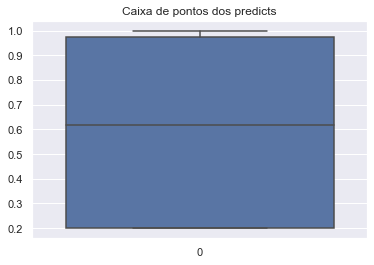

In [32]:
sns.boxplot(data=predict_x).set(title="Caixa de pontos dos predicts")
df_predicted = pd.DataFrame(predict_x, columns=['predict'])

In [33]:
df_predicted.describe()

,predict
count,999.000000
mean,0.578659
std,0.354753
min,0.198957
25%,0.198957
50%,0.616038
75%,0.975519
max,0.999999


In [34]:
IQR = (9.655807e-01)-(8.240152e-14)
print(f'IRQ: {IQR}')
lower_limit = (8.240152e-14) - (1.5*IQR)
upper_limit = (9.655807e-01) + (1.5*IQR)
print(upper_limit)
print(lower_limit)

IRQ: 0.9655806999999176
2.4139517499998764
-1.448371049999794


In [35]:
df_scores_filtered = df_predicted[(df_predicted['predict']>lower_limit) & (df_predicted['predict']<upper_limit)]
print(df_scores_filtered)

      predict
0    0.266923
1    0.359533
2    0.375564
3    0.391746
4    0.389796
..        ...
994  0.943799
995  0.198957
996  0.942961
997  0.946615
998  0.950046

[999 rows x 1 columns]


### Encriptando o dataset.

In [36]:
import hashlib

def sha_512_hash(data):
  return hashlib.sha512(data.encode('utf-8')).hexdigest()

In [43]:
from encryption_box import rsa_encrypt

rsa_encrypt(X_test, predict_x)

TypeError: rsa_encrypt() missing 2 required positional arguments: 'classes' and 'x'

In [46]:
import csv
from rsa_2psk import RSA

X_test = pd.read_csv("./dados_sensiveis_mix_teste.csv")
X_test.fillna(X_test.mean(), inplace=True)

classes = X_test["Classe"]

with open('dataset_encriptado_teste.csv', 'w',  newline='', encoding='utf-8') as csv_file:
  writer:object = csv.writer(csv_file)
  writer.writerow(['Coluna A', 'Coluna B', 'Coluna C'])
  rsa_alg = RSA(17, 41)
  rsa_alg.calc_n()
  rsa_alg.calc_euler_totient()
  rsa_alg.calc_public_key(15)
  for index in range(1, 1000-1):
    if(round(predict_x[index][0]) == classes[index]):
      # Encriptando os dados.
      r1 = rsa_alg.encrypt_message(X_test['Coluna A'][index])
      r2 = rsa_alg.encrypt_message(X_test['Coluna B'][index])
      r3 = rsa_alg.encrypt_message(X_test['Coluna C'][index])
      # Encriptando
      encrypted_a: str = ''.join(str(x) for x in r1)
      encrypted_b: str = ''.join(str(y) for y in r2)
      encrypted_c: str = ''.join(str(z) for z in r3)
      # Escrevendo no arquivo.
      writer.writerow([
        encrypted_a,
        encrypted_b,
        encrypted_c
        ])
    else:
      writer.writerow([X_test['Coluna A'][index], X_test['Coluna B'][index], X_test['Coluna C'][index]])

Maria Gomes
Android 5.0.1
Chargista
Dra. Ana Clara Nascimento
Android 7.1
Assessor de imprensa
Bryan Dias
Android 4.0.3
Juiz de direito
Dr. João Gabriel da Mata
Android 4.2.2
Profissional de relacionamento com investidores RI
Nicolas Caldeira
Android 1.5
Redator
Sr. Pedro Miguel Mendes
Android 1.1
Aviador
Renan Porto
Android 7.1.1
Lixeiro/Coletor de lixo
Emilly Melo
Android 6.0
Cientista da informação e documentação
Maysa Freitas
Android 4.4
Coloproctologista
Sra. Lorena Jesus
Android 9
Engenheiro de som
Matheus Teixeira
Android 2.3.2
Militar da Marinha
Davi Lucas Almeida
Android 1.1
Gestor ambiental
Maysa Cardoso
Android 4.4.4
Dublê
Emanuel Peixoto
Android 1.0
Sacoleira
Dr. Enrico Pires
Android 7.0
Contábil
Olivia Castro
Android 2.2.1
Subprefeito
Srta. Laura Teixeira
Android 5.0
Torneiro mecânico
Antônio Duarte
Android 4.0
Cerimonialista
Renan Nunes
Android 2.2
Guarda ou policial rodoviário
Sarah Gonçalves
6566875433338108
+55 (084) 6289 0453
Dra. Bárbara Nascimento
4100617429369103
+

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_6000\2621482728.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_test.fillna(X_test.mean(), inplace=True)


</hr>

## > Resultado obtido (Modelo salvo na pasta model/2.0)
### Previsão no dataset de teste.
![Resultado de previsão do teste](./assets/img/model_2.0_sequential_test_predict.png)
### Previsão em um dataset diferente(dataset_dados_sensiveis_mix.csv), sem treinamento prévio no dataset.
![Resultado de previsão do teste](./assets/img/model_2.0_sequential_dataset_predict.png)

* Com um dataset de tamanho relativamente pequeno, foi possível encontrar um modelo de acurácia maior que 80% durante o fitting.


### Agora será testado 10 módelos e feito a média entre eles para verificar se o modelo e os métodos utilizados foram feitos de maneira desejada.

### Criando 10 modelos e pegando 10 pedaços do dataset para comparar precisão entre os modelos Sequenciais

In [36]:
import matplotlib.pyplot as plot
import numpy as np
import random
from plot_history_helper import plot_history
from keras import callbacks
from sklearn.model_selection import StratifiedKFold


# Seed fix para poder reproduzir o "teste".
seed = random.randint(0, 32)
np.random.seed(seed)

#X = pd.read_csv("./dados_sensiveis_com_classes.csv")
#X.fillna(X.mean(), inplace=True)

X = pd.read_csv("./dados_sensiveis_mix_com_classes.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])

y = X["Classe"]
X.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values

# Pegando 10 cortes do dataset original de maneira aleatória.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores:list = []
# Criando 10 modelos com 10 datasets cortados pegos do dataset original e depois comparando os resultados.
list_of_models:list = []
for train, test in kfold.split(X, y):
  clear_session()
  #print(test, train)
  # Salvando os melhores pesos.
  earlystopping = callbacks.EarlyStopping(monitor ="val_loss", mode ="min", patience = 5, restore_best_weights = True)
  # modelo baseado em uma pilha de layers, utilizando o layer mais comum Dense.
  input_dim = X.shape[1]
  model = keras.Sequential()
  model.add(keras.layers.Dense(12, input_dim = input_dim, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  # Configurando o modelo de treinamento.
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
  ])
  model.summary() # Mostra os paramestros disponíveis para treinar
  #Treinando o modelo.
  history = model.fit(
    X[train],
    y[train],
    epochs=100,
    verbose=0,
  )
  loss, tp, fp, tn, fn, scores, precision, = model.evaluate(X[test], y[test], verbose=0)
  print(f"%s: %.2f%%" % (model.metrics_names[1], scores*100))
  cvscores.append(scores * 100)
  list_of_models.append((model, (scores * 100)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_2284\4250576102.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


tp: 92.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
tp: 88.00%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)

### Lista de modelos, resultados deles e média de acurácia.

In [37]:
for model, score in list_of_models:
  print(model, score)
print("Média: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

<keras.engine.sequential.Sequential object at 0x000001A34E596890> 92.00000166893005
<keras.engine.sequential.Sequential object at 0x000001A350AF22C0> 87.99999952316284
<keras.engine.sequential.Sequential object at 0x000001A34E597640> 87.00000047683716
<keras.engine.sequential.Sequential object at 0x000001A352031FC0> 93.99999976158142
<keras.engine.sequential.Sequential object at 0x000001A35438FCD0> 92.00000166893005
<keras.engine.sequential.Sequential object at 0x000001A35685EBF0> 94.9999988079071
<keras.engine.sequential.Sequential object at 0x000001A359FDF790> 93.00000071525574
<keras.engine.sequential.Sequential object at 0x000001A359FDF460> 94.9999988079071
<keras.engine.sequential.Sequential object at 0x000001A35685D510> 92.00000166893005
<keras.engine.sequential.Sequential object at 0x000001A35C35F490> 91.91918969154358
Média: 91.99% (+/- 2.53%)


### Selecionando o melhor modelo Sequencial dos 10 criados.

In [38]:
maximum = 0
for k, v in list_of_models:
  #print(k, v)
  if v > maximum:
    maximum = v
    m = k
model = m
best_score = maximum

print("Melhor modelo com a maior avaliação escolhida:")
print(model, best_score)

Melhor modelo com a maior avaliação escolhida:
<keras.engine.sequential.Sequential object at 0x000001A35685EBF0> 94.9999988079071


## Olhando o resultado acima, podemos dizer que o modelos criados possuem um desempenho relativamente bom, considerando que a média esperada é de 70% até 90%.

## > Avaliação do ultimo modelo criado no loop modelo.

### Criando o dataset.

In [39]:
# CRIANDO UM DATASET COM DADOS ALEATÓRIOS.
#sensitive_data_gen.write_csv_data_random(name="dados_sensiveis_mix_com_classes.csv", title=['Coluna A', 'Coluna B', 'Coluna C', 'Classe'], size=1000)
#sensitive_data_gen.write_csv_data_sensitive_only(name="dados_sensiveis_com_classes.csv", title=['Coluna A', 'Coluna B', 'Coluna C','Classe'], size=1000)

### Carregando um dataset médiano para avaliar o ultimo modelo criado no loop.

In [40]:
# Leitura da dataset.
X = pd.read_csv("./dados_sensiveis_mix_com_classes.csv")
X.fillna(X.mean(), inplace=True)

columns = list(X)
print("Antes de dropar a Classe Y: \n", X)

# Categorizando.
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = pd.Categorical(pd.factorize(X[i])[0])

data:any = X

# Fazendo o pré processamento.
le = preprocessing.LabelEncoder()
for i in columns:
    if X[i].dtypes == 'object':
        X[i] = le.fit_transform(X[i])
        
y = X["Classe"]
X.drop(["Classe"], axis=1, inplace=True)

# Criando variáveis de entradas
X = X.values
y = y.values
print("Depois de dropar a Classe Y: \n", X)

Antes de dropar a Classe Y: 
                       Coluna A          Coluna B                   Coluna C  \
0               Yasmin Peixoto        Android 11                 Naturólogo   
1    Sra. Ana Lívia Nascimento       Android 7.0                  Atendente   
2          João Vitor Monteiro     Android 5.1.1                   Escultor   
3     Maria Fernanda das Neves       Android 1.6                    Ecólogo   
4         Maria Alice Monteiro  6011410271726098           +55 84 2448-3106   
..                         ...               ...                        ...   
994                Alice Viana  4299909535288371              0900-725-4465   
995             Lorena Freitas     Android 2.3.7                 Paramédico   
996               Rafael Cunha       Android 4.2                    Geólogo   
997            Beatriz da Mota     Android 4.2.2  Assistente administrativo   
998              Eloah Freitas       Android 4.0                  Separador   

     Classe  
0      

C:\Users\Magoimortal\AppData\Local\Temp\ipykernel_2284\264493589.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.fillna(X.mean(), inplace=True)


### Avaliando o modelo com o dataset novo.

In [41]:
# Vendo versão final do resultado.
#clear_session()
loss, tp, fp, tn, fn, accuracy, precision = model.evaluate(X, y, verbose=2)
print(f"Acurácia no dataset: {accuracy}")
print(f"Perca no dataset: {loss}")

32/32 - 0s - loss: 0.1554 - tp: 449.0000 - fp: 50.0000 - tn: 479.0000 - fn: 21.0000 - accuracy: 0.9289 - precision: 0.8998 - 291ms/epoch - 9ms/step
Acurácia no dataset: 0.9289289116859436
Perca no dataset: 0.15539823472499847


### Verificando a previsão com os valores reais

In [42]:
model.summary()
predict_x=model.predict(X[:10]) 
classes_x=np.argmax(predict_x, axis=1)
for i in range(10):
	print(f"X={X[i]} Previsão={predict_x[i]} Y={y[i]}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                48        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 70ms/step
X=[0 0 0] Previsão=[0.07411101] Y=0
X=[1 1 1] Previsão=[0.11858934] Y=0
X=[2 2 2] Previsão=[0.23319288] Y=0
X=[3 3 3] Previsão=[0.32750258] Y=0
X=[4 4 4] Previsão=[0.3926218] Y=1
X=[5 5 5] Previsão=[0.39579707] Y=1
X=[6 6 6] Previsão=[0.39898115] Y=1
X=[7 7 7] Previsão=

## Salvando o modelo na pasta models

In [43]:
filepath = "./model/2.5"
model.save(filepath)
keras.models.load_model(filepath)

INFO:tensorflow:Assets written to: ./model/2.5\assets


## Carregando o modelo da pasta models

In [44]:
model = tf.keras.models.load_model('./model/2.5')